In [2994]:
import pandas as pd
import numpy as np
import random
import ast
import matplotlib.pyplot as plt

In [2995]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

<hr>

# Output from Problem 1: we have filename and calculated distance

In [2996]:
output = pd.read_csv("output_secondAttempt.csv")

In [2997]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31680 entries, 0 to 31679
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  31680 non-null  object 
 1   distance  17964 non-null  float64
dtypes: float64(1), object(1)
memory usage: 495.1+ KB


In [2998]:
output.head()

filename    distance
0  9598683_040_pred.png   91.736690
1  9063955_094_pred.png  100.589940
2  9579246_002_pred.png         NaN
3  9802170_058_pred.png  100.430003
4  9950790_056_pred.png         NaN

In [2999]:
output = output.sort_values(by="filename").reset_index(drop=True)

In [3000]:
output['filename'] = output['filename'].astype(str)
output["filename"] = output["filename"].str.replace("_pred.png", "", regex=False)

In [3001]:
output[["case", "slice"]] = output["filename"].str.split("_", expand=True)

In [3002]:
output = output[['filename', 'case', 'slice', 'distance']]

In [3003]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31680 entries, 0 to 31679
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  31680 non-null  object 
 1   case      31680 non-null  object 
 2   slice     31680 non-null  object 
 3   distance  17964 non-null  float64
dtypes: float64(1), object(3)
memory usage: 990.1+ KB


In [3004]:
# Example of case 9002116 with label B (OA: 3 to 4)
output.head(160)

filename     case slice    distance
0    9002116_001  9002116   001         NaN
1    9002116_002  9002116   002         NaN
2    9002116_003  9002116   003         NaN
3    9002116_004  9002116   004         NaN
4    9002116_005  9002116   005         NaN
5    9002116_006  9002116   006         NaN
6    9002116_007  9002116   007         NaN
7    9002116_008  9002116   008  110.924907
8    9002116_009  9002116   009         NaN
9    9002116_010  9002116   010   95.146036
10   9002116_011  9002116   011         NaN
11   9002116_012  9002116   012         NaN
12   9002116_013  9002116   013         NaN
13   9002116_014  9002116   014         NaN
14   9002116_015  9002116   015         NaN
15   9002116_016  9002116   016         NaN
16   9002116_017  9002116   017         NaN
17   9002116_018  9002116   018         NaN
18   9002116_019  9002116   019         NaN
19   9002116_020  9002116   020         NaN
20   9002116_021  9002116   021         NaN
21   9002116_022  9002116   022   38.099684
22   9002116_023  9002116   023         NaN
23   9002116_024  9002116   024         NaN
24   9002116_025  9002116   025         NaN
25   9002116_026  9002116   026   75.160767
26   9002116_027  9002116   027   68.689450
27   9002116_028  9002116   028   67.349619
28   9002116_029  9002116   029   67.144481
29   9002116_030  9002116   030   67.522777
30   9002116_031  9002116   031   68.459315
31   9002116_032  9002116   032   69.239775
32   9002116_033  9002116   033   69.552545
33   9002116_034  9002116   034   71.826518
34   9002116_035  9002116   035         NaN
35   9002116_036  9002116   036         NaN
36   9002116_037  9002116   037         NaN
37   9002116_038  9002116   038         NaN
38   9002116_039  9002116   039         NaN
39   9002116_040  9002116   040         NaN
40   9002116_041  9002116   041         NaN
41   9002116_042  9002116   042         NaN
42   9002116_043  9002116   043         NaN
43   9002116_044  9002116   044         NaN
44   9002116_045  9002116   045         NaN
45   9002116_046  9002116   046         NaN
46   9002116_047  9002116   047         NaN
47   9002116_048  9002116   048         NaN
48   9002116_049  9002116   049         NaN
49   9002116_050  9002116   050         NaN
50   9002116_051  9002116   051         NaN
51   9002116_052  9002116   052         NaN
52   9002116_053  9002116   053         NaN
53   9002116_054  9002116   054         NaN
54   9002116_055  9002116   055         NaN
55   9002116_056  9002116   056         NaN
56   9002116_057  9002116   057         NaN
57   9002116_058  9002116   058  102.706782
58   9002116_059  9002116   059  104.477525
59   9002116_060  9002116   060  104.820274
60   9002116_061  9002116   061  105.382650
61   9002116_062  9002116   062  105.122708
62   9002116_063  9002116   063  105.718834
63   9002116_064  9002116   064  106.892777
64   9002116_065  9002116   065  106.295051
65   9002116_066  9002116   066  107.338565
66   9002116_067  9002116   067  106.551461
67   9002116_068  9002116   068  107.061919
68   9002116_069  9002116   069   99.283371
69   9002116_070  9002116   070  100.036604
70   9002116_071  9002116   071  100.347859
71   9002116_072  9002116   072  104.756754
72   9002116_073  9002116   073  110.308689
73   9002116_074  9002116   074  108.204478
74   9002116_075  9002116   075  107.079837
75   9002116_076  9002116   076  112.214360
76   9002116_077  9002116   077         NaN
77   9002116_078  9002116   078   75.258171
78   9002116_079  9002116   079   73.218711
79   9002116_080  9002116   080   72.341000
80   9002116_081  9002116   081  112.911711
81   9002116_082  9002116   082  111.174675
82   9002116_083  9002116   083  116.093995
83   9002116_084  9002116   084  117.817524
84   9002116_085  9002116   085  119.398701
85   9002116_086  9002116   086  121.183030
86   9002116_087  9002116   087  121.070810
87   9002116_088  9002116   088  121.353035
88   9002116_089  9002116   089  121.108750
89   9002116_090  9002116   090  118.576611
90  

In [3005]:
case_9002116 = output[output['case'] == '9002116']
case_9002116.head()

filename     case slice  distance
0  9002116_001  9002116   001       NaN
1  9002116_002  9002116   002       NaN
2  9002116_003  9002116   003       NaN
3  9002116_004  9002116   004       NaN
4  9002116_005  9002116   005       NaN

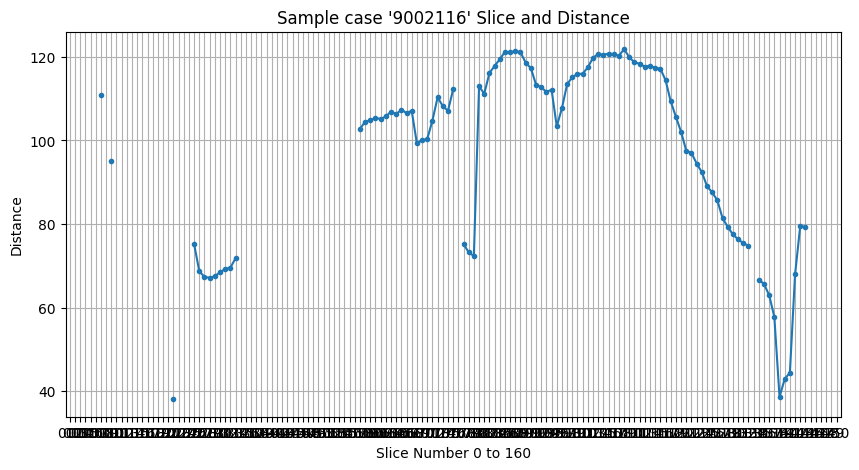

In [3006]:
plt.figure(figsize=(10, 5))
plt.plot(case_9002116['slice'], case_9002116['distance'], marker='.')

plt.xlabel('Slice Number 0 to 160')
plt.ylabel('Distance')
plt.title("Sample case '9002116' Slice and Distance")

plt.grid(True)
plt.show()

In [3007]:
# Example of case 9005075 with label A (non-OA: 0 to 2)
output.iloc[160:320]

filename     case slice    distance
160  9005075_001  9005075   001  117.185504
161  9005075_002  9005075   002         NaN
162  9005075_003  9005075   003         NaN
163  9005075_004  9005075   004   58.857028
164  9005075_005  9005075   005  199.841168
165  9005075_006  9005075   006  181.243945
166  9005075_007  9005075   007         NaN
167  9005075_008  9005075   008  221.175241
168  9005075_009  9005075   009         NaN
169  9005075_010  9005075   010         NaN
170  9005075_011  9005075   011         NaN
171  9005075_012  9005075   012         NaN
172  9005075_013  9005075   013         NaN
173  9005075_014  9005075   014         NaN
174  9005075_015  9005075   015         NaN
175  9005075_016  9005075   016         NaN
176  9005075_017  9005075   017         NaN
177  9005075_018  9005075   018         NaN
178  9005075_019  9005075   019         NaN
179  9005075_020  9005075   020         NaN
180  9005075_021  9005075   021         NaN
181  9005075_022  9005075   022         NaN
182  9005075_023  9005075   023         NaN
183  9005075_024  9005075   024         NaN
184  9005075_025  9005075   025         NaN
185  9005075_026  9005075   026   90.823487
186  9005075_027  9005075   027   72.369714
187  9005075_028  9005075   028   68.247472
188  9005075_029  9005075   029   72.548467
189  9005075_030  9005075   030   72.834851
190  9005075_031  9005075   031   73.679729
191  9005075_032  9005075   032   75.209943
192  9005075_033  9005075   033   76.886565
193  9005075_034  9005075   034   78.117421
194  9005075_035  9005075   035   79.867111
195  9005075_036  9005075   036   81.571378
196  9005075_037  9005075   037   82.829897
197  9005075_038  9005075   038   84.903863
198  9005075_039  9005075   039   86.663423
199  9005075_040  9005075   040   88.768689
200  9005075_041  9005075   041   91.494140
201  9005075_042  9005075   042   96.150865
202  9005075_043  9005075   043  108.526126
203  9005075_044  9005075   044  109.466908
204  9005075_045  9005075   045  111.626515
205  9005075_046  9005075   046  112.803280
206  9005075_047  9005075   047  113.649911
207  9005075_048  9005075   048  113.517526
208  9005075_049  9005075   049  114.608240
209  9005075_050  9005075   050  114.408376
210  9005075_051  9005075   051  115.602230
211  9005075_052  9005075   052  115.503487
212  9005075_053  9005075   053  116.443771
213  9005075_054  9005075   054  116.103271
214  9005075_055  9005075   055  116.083688
215  9005075_056  9005075   056  116.539337
216  9005075_057  9005075   057  116.832792
217  9005075_058  9005075   058  117.190088
218  9005075_059  9005075   059  117.031557
219  9005075_060  9005075   060  115.628214
220  9005075_061  9005075   061  116.202783
221  9005075_062  9005075   062  115.445022
222  9005075_063  9005075   063  115.756141
223  9005075_064  9005075   064  115.075250
224  9005075_065  9005075   065  115.406069
225  9005075_066  9005075   066  114.260469
226  9005075_067  9005075   067  113.718235
227  9005075_068  9005075   068  111.818826
228  9005075_069  9005075   069  111.457116
229  9005075_070  9005075   070  111.397112
230  9005075_071  9005075   071  111.273851
231  9005075_072  9005075   072  110.642302
232  9005075_073  9005075   073  116.045512
233  9005075_074  9005075   074  115.100077
234  9005075_075  9005075   075  116.433263
235  9005075_076  9005075   076  116.905190
236  9005075_077  9005075   077  116.360102
237  9005075_078  9005075   078  116.738109
238  9005075_079  9005075   079  116.916351
239  9005075_080  9005075   080  116.279331
240  9005075_081  9005075   081  115.487427
241  9005075_082  9005075   082  117.574840
242  9005075_083  9005075   083  119.575687
243  9005075_084  9005075   084  117.674264
244  9005075_085  9005075   085  118.290805
245  9005075_086  9005075   086  118.057241
246  9005075_087  9005075   087  115.855709
247  9005075_088  9005075   088  113.859430
248  9005075_089  9005075   089  112.992911
249  9005075_090  9005075   090  111.217662
250 

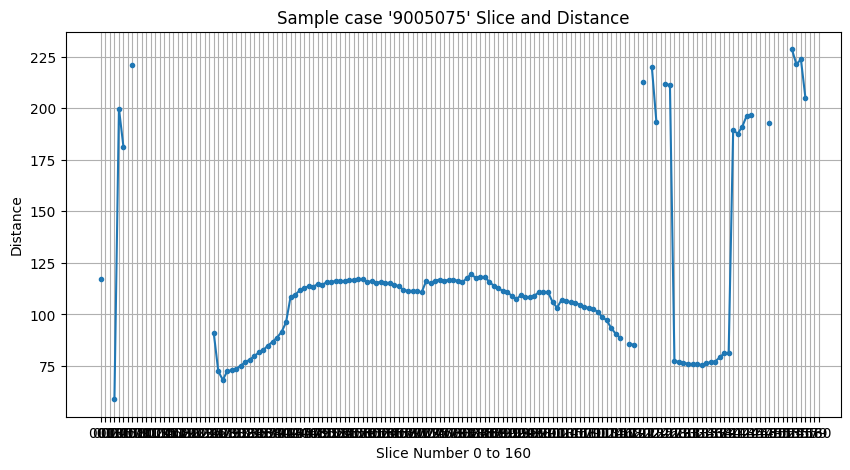

In [3008]:
case_9005075 = output[output['case'] == '9005075']

plt.figure(figsize=(10, 5))
plt.plot(case_9005075['slice'], case_9005075['distance'], marker='.')

plt.xlabel('Slice Number 0 to 160')
plt.ylabel('Distance')
plt.title("Sample case '9005075' Slice and Distance")

plt.grid(True)
plt.show()

In [3009]:
output.tail(160)

filename     case slice    distance
31520  9997856_001  9997856   001         NaN
31521  9997856_002  9997856   002         NaN
31522  9997856_003  9997856   003         NaN
31523  9997856_004  9997856   004         NaN
31524  9997856_005  9997856   005         NaN
31525  9997856_006  9997856   006         NaN
31526  9997856_007  9997856   007         NaN
31527  9997856_008  9997856   008         NaN
31528  9997856_009  9997856   009         NaN
31529  9997856_010  9997856   010         NaN
31530  9997856_011  9997856   011         NaN
31531  9997856_012  9997856   012         NaN
31532  9997856_013  9997856   013         NaN
31533  9997856_014  9997856   014         NaN
31534  9997856_015  9997856   015         NaN
31535  9997856_016  9997856   016         NaN
31536  9997856_017  9997856   017         NaN
31537  9997856_018  9997856   018         NaN
31538  9997856_019  9997856   019         NaN
31539  9997856_020  9997856   020   96.018197
31540  9997856_021  9997856   021   96.937935
31541  9997856_022  9997856   022   85.066949
31542  9997856_023  9997856   023   71.255690
31543  9997856_024  9997856   024   67.960153
31544  9997856_025  9997856   025   87.245242
31545  9997856_026  9997856   026   78.253052
31546  9997856_027  9997856   027   78.907958
31547  9997856_028  9997856   028   82.037916
31548  9997856_029  9997856   029   81.883247
31549  9997856_030  9997856   030   80.916516
31550  9997856_031  9997856   031   81.171457
31551  9997856_032  9997856   032   79.017253
31552  9997856_033  9997856   033   81.035992
31553  9997856_034  9997856   034   79.865297
31554  9997856_035  9997856   035   80.702700
31555  9997856_036  9997856   036   81.040383
31556  9997856_037  9997856   037   82.640001
31557  9997856_038  9997856   038   83.832417
31558  9997856_039  9997856   039   84.093693
31559  9997856_040  9997856   040   84.613548
31560  9997856_041  9997856   041   85.262435
31561  9997856_042  9997856   042   85.030912
31562  9997856_043  9997856   043   84.594280
31563  9997856_044  9997856   044   84.748315
31564  9997856_045  9997856   045   84.230660
31565  9997856_046  9997856   046   84.972949
31566  9997856_047  9997856   047   86.319556
31567  9997856_048  9997856   048   85.531084
31568  9997856_049  9997856   049   86.492092
31569  9997856_050  9997856   050   88.938354
31570  9997856_051  9997856   051   88.889079
31571  9997856_052  9997856   052   89.213063
31572  9997856_053  9997856   053   91.066669
31573  9997856_054  9997856   054   92.685560
31574  9997856_055  9997856   055   96.106884
31575  9997856_056  9997856   056   98.612420
31576  9997856_057  9997856   057  105.539398
31577  9997856_058  9997856   058  106.706720
31578  9997856_059  9997856   059  105.783056
31579  9997856_060  9997856   060   93.711696
31580  9997856_061  9997856   061   98.956075
31581  9997856_062  9997856   062  104.541144
31582  9997856_063  9997856   063  107.284652
31583  9997856_064  9997856   064  109.832448
31584  9997856_065  9997856   065  110.632684
31585  9997856_066  9997856   066  111.370949
31586  9997856_067  9997856   067  112.651065
31587  9997856_068  9997856   068  112.594731
31588  9997856_069  9997856   069  112.516072
31589  9997856_070  9997856   070  111.213111
31590  9997856_071  9997856   071         NaN
31591  9997856_072  9997856   072         NaN
31592  9997856_073  9997856   073         NaN
31593  9997856_074  9997856   074         NaN
31594  9997856_075  9997856   075         NaN
31595  9997856_076  9997856   076         NaN
31596  9997856_077  9997856   077         NaN
31597  9997856_078  9997856   078         NaN
31598  9997856_079  9997856   079  116.544263
31599  9997856_080  9997856   080  119.088045
31600  9997856_081  9997856   081  118.858657
31601  9997856_082  9997856   082  125.168869
31602  9997856_083  9997856   083  125.176473
31603  9997856_084  9997856   084  124.236243
31604  9997856_085  9997856   085  117.749607
31605  9997856_086  9997856   086  120.626617
31606  9

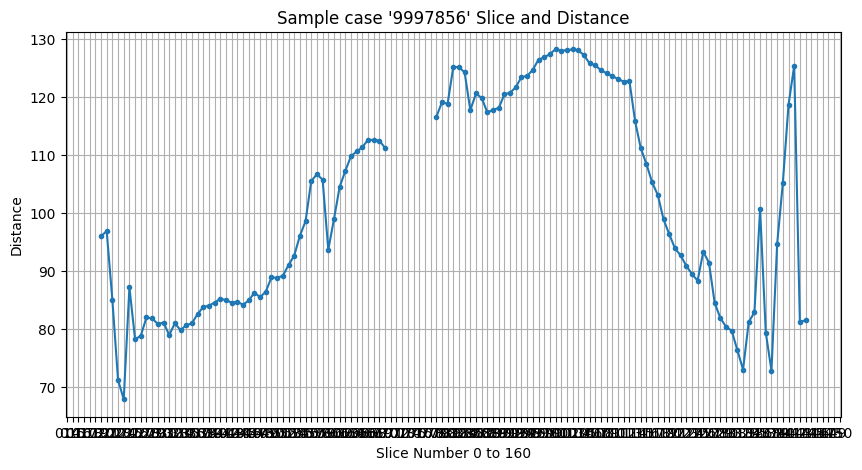

In [3010]:
case_9997856 = output[output['case'] == '9997856']

plt.figure(figsize=(10, 5))
plt.plot(case_9997856['slice'], case_9997856['distance'], marker='.')

plt.xlabel('Slice Number 0 to 160')
plt.ylabel('Distance')
plt.title("Sample case '9997856' Slice and Distance")

plt.grid(True)
plt.show()

In [3011]:
output['case'].nunique()

198

In [3012]:
case_list = output['case'].unique().tolist()

In [3013]:
type(case_list[0])

str

In [3014]:
case_list.sort()

In [3015]:
len(case_list)

198

In [3016]:
case_list

['9002116',
 '9005075',
 '9005132',
 '9026934',
 '9030718',
 '9031141',
 '9033275',
 '9037952',
 '9043945',
 '9047800',
 '9048789',
 '9049007',
 '9058960',
 '9063955',
 '9064631',
 '9065272',
 '9072646',
 '9074878',
 '9081858',
 '9086868',
 '9088414',
 '9089119',
 '9101270',
 '9123404',
 '9126260',
 '9135752',
 '9138965',
 '9155861',
 '9157453',
 '9159804',
 '9167541',
 '9173013',
 '9188806',
 '9189986',
 '9208016',
 '9238970',
 '9253530',
 '9270239',
 '9273764',
 '9282257',
 '9291078',
 '9294761',
 '9300338',
 '9310416',
 '9326657',
 '9328093',
 '9330729',
 '9341240',
 '9369225',
 '9372474',
 '9373191',
 '9374235',
 '9386206',
 '9393987',
 '9402139',
 '9406962',
 '9410253',
 '9414291',
 '9414391',
 '9427858',
 '9430102',
 '9437407',
 '9438742',
 '9438852',
 '9441420',
 '9448098',
 '9452100',
 '9458093',
 '9458176',
 '9461404',
 '9467278',
 '9467311',
 '9469520',
 '9472254',
 '9475264',
 '9488441',
 '9493073',
 '9493245',
 '9493338',
 '9494867',
 '9495437',
 '9495873',
 '9497375',
 '95

<hr>

# Match case number to "KL grade for baseline year and 2-year follow up.csv"

In [3017]:
data = pd.read_csv("../KL grade for baseline year and 2-year follow up.csv")


In [3018]:
data['cases'] = data['cases'].astype(str)

In [ ]:
data.head()

cases  V00XRKL V03KL
0    9002116        3     B
1    9005075        0     A
2    9005132        4     B
3    9026934        2     A
4    9030718        3     B
5    9031141        0     A
6    9033275        1     A
7    9037952        0     A
8    9043945        1     A
9    9047800        3     B
10   9048789        1     A
11   9049007        4     B
12   9058960        2     A
13   9063955        2     B
14   9064631        1     A
15   9065272        4     B
16   9072646        2     A
17   9074878        2     B
18   9081858        0     A
19   9086868        4     B
20   9088414        2     A
21   9089119        2     A
22   9101270        2     A
23   9123404        2     B
24   9126260        2     B
25   9135752        2     B
26   9138965        3     B
27   9155861        0     A
28   9157453        0     A
29   9159804        3     B
30   9167541        4     B
31   9173013        4     B
32   9188806        3     B
33   9189986        2     A
34   9208016        3     B
35   9238970        2     B
36   9253530        2     B
37   9270239        0     A
38   9273764        2     A
39   9282257        4     B
40   9291078        4     B
41   9294761        3     B
42   9300338        3     B
43   9310416        0     A
44   9326657        3     B
45   9328093        0     A
46   9330729        3     B
47   9341240        4     B
48   9369225        2     A
49   9372474        1     A
50   9373191        4     B
51   9374235        2     B
52   9386206        2     B
53   9393987        4     B
54   9402139        3     B
55   9406962        2     A
56   9410253        1     A
57   9414291        2     B
58   9414391        4     B
59   9427858        3     B
60   9430102        2     B
61   9437407        3     B
62   9438742        0     A
63   9438852        4     B
64   9441420        4     B
65   9448098        4     B
66   9452100        3     B
67   9458093        4     B
68   9458176        2     A
69   9461404        3     B
70   9467278        3     B
71   9467311        4     B
72   9469520        2     B
73   9472254        2     A
74   9475264        3     B
75   9488441        2     A
76   9493073        2     B
77   9493245        3     B
78   9493338        2     B
79   9494867        4     B
80   9495437        3     B
81   9495873        4     B
82   9497375        2     B
83   9501362        2     B
84   9504862        3     B
85   9511423        2     B
86   9512864        4     B
87   9513860        4     B
88   9530445        4     B
89   9532970        2     B
90   9542088        2     B
91   9556110        0     A
92   9556402        4     B
93   9559547        3     B
94   9559860        4     B
95   9560702        2     A
96   9564729        3     B
97   9568504        3     B
98   9568974        4     A
99   9570949        1     B
100  9579246        4     B
101  9581915        4     A
102  9584990        1     B
103  9585931        4     B
104  9587941        2     A
105  9596238        2     B
106  9597241        4     A
107  9598235        1     B
108  9598683        4     B
109  9601011        4     A
110  9627716        0     B
111  9628393        2     A
112  9634187        3     A
113  9634422        4     B
114  9635177        2     B
115  9637676        3     B
116  9638953        4     B
117  9639088        2     B
118  9640119        3     B
119  9644109        2     B
120  9645478        4     A
121  9646223        3     B
122  9651214        2     B
123  9658152        1     A
124  9680112        3     A
125  9690658        4     B
126  9693161        3     B
127  9693161        3     B
128  9703327        0     A
129  9708289        4     B
130  9711284        3     B
131  9716393        4     B
132  9719999        4     B
133  9721540        4     B
134  9726778        4     B
135  9729986        1     A
136  9740303        3     B
137  9745458        3     B
138  9746416        4     B
139  9753580        2     B
140  9761431        2     A
141  9764454        1     A
142

In [3020]:
print(f"Unique cases: {data['cases'].nunique()}")

Unique cases: 196


In [3021]:
case_list_2 = data['cases'].unique().tolist()

In [3022]:
case_list_2.sort()

In [3023]:
type(case_list_2[0])

str

In [3024]:
if case_list == case_list_2:
    print("The case lists are identical.")
else:
    diff1 = set(case_list) - set(case_list_2)
    diff2 = set(case_list_2) - set(case_list)

    print("Items in case_list but not in case_list_2:", diff1)
    print("Items in case_list_2 but not in case_list:", diff2)

Items in case_list but not in case_list_2: {'9566972', '9633944'}
Items in case_list_2 but not in case_list: set()


* There are 2 cases in 'preds' folder that are not in "KL grade for baseline year and 2-year follow up.csv"

* These 2 cases don't have KL grades and labels (A/B)

* Will be removed.

In [3025]:
cases_to_removed = output[output['case'].isin(diff1)]

In [3026]:
cases_to_removed.shape

(320, 4)

* Drop 2 cases {'9566972', '9633944'} : 160 slices x 2 = 320 rows

In [3027]:
output.shape

(31680, 4)

In [3028]:
output = output.drop(cases_to_removed.index).reset_index(drop=True)

In [3029]:
output.shape

(31360, 4)

In [3030]:
output['slice'] = output['slice'].astype(int)

In [3031]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31360 entries, 0 to 31359
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  31360 non-null  object 
 1   case      31360 non-null  object 
 2   slice     31360 non-null  int64  
 3   distance  17858 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 980.1+ KB


<hr>

# Prepare final_df for next step

In [3032]:
final_df = (
    output
    .groupby("case")["distance"]
    .apply(list)
    .reset_index(name="distance_vector")
)

In [3033]:
final_df.head(2)

case  \
0  9002116   
1  9005075   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           distance_vector  
0                                                                                                                                                                                                                                                                                                                                                                                               [nan, nan, nan, nan, nan, nan, nan, 110.92490655121276, nan, 95.1460358119512, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 38.09968368844908, nan, nan, nan, 75.16076653866492, 68.68944957793391, 67.34961867183334, 67.14448144638872, 67.52277737611274, 68.45931484357078, 69.23977487481297, 69.5525448379207, 71.82651816339371, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 102.70678200308228, 104.47752501814466, 104.82027354790688, 105.38265015979604, 105.12270830759331, 105.71883368601972, 106.8927774867111, 106.2950506572216, 107.33856506429689, 106.5514607484864, 107.06191919674914, 99.28337139706244, 100.03660431844528, 100.34785937495955, 104.7567535177006, 110.30868863195889, 108.20447750654284, 107.07983650555232, 112.21436003656488, nan, 75.25817081727175, 73.218710983905, 72.34100018587897, 112.91171089138555, 111.17467515421494, 116.09399545515092, 117.81752427654268, 119.39870114200586, 121.18303042124052, 121.0708095250289, 121.35303483028125, 121.10874979903556, 118.57661079293555, 117.27822070616732, 113.33446020727744, 112.71016179392528, 111.60748459681017, 112.09612379764494, 103.34243808109844, 107.71882502727917, 113.45336874279612, 115.0959808122118, 115.91107179366608, ...]  
1  [117.18550361689393, nan, nan, 58.85702837997868, 199.8411676063035, 181.2439450701824, nan, 221.17524081080367, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 90.8234870147909, 72.36971367740058, 68.24747164635706, 72.5484666564834, 72.83485099510659, 73.67972936617434, 75.20994282264742, 76.88656519044608, 78.11742127844602, 79.86711139158396, 81.5713783268633, 82.82989727523965, 84.90386303948512, 86.6634231529742, 88.76868881124491, 91.49413979810612, 96.15086531933171, 108.52612567726902, 109.46690751365657, 111.62651498519764, 112.8032797260982, 113.649911

<hr>

In [3034]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   case             196 non-null    object
 1   distance_vector  196 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [3035]:
final_df.head(2)

case  \
0  9002116   
1  9005075   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           distance_vector  
0                                                                                                                                                                                                                                                                                                                                                                                               [nan, nan, nan, nan, nan, nan, nan, 110.92490655121276, nan, 95.1460358119512, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 38.09968368844908, nan, nan, nan, 75.16076653866492, 68.68944957793391, 67.34961867183334, 67.14448144638872, 67.52277737611274, 68.45931484357078, 69.23977487481297, 69.5525448379207, 71.82651816339371, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 102.70678200308228, 104.47752501814466, 104.82027354790688, 105.38265015979604, 105.12270830759331, 105.71883368601972, 106.8927774867111, 106.2950506572216, 107.33856506429689, 106.5514607484864, 107.06191919674914, 99.28337139706244, 100.03660431844528, 100.34785937495955, 104.7567535177006, 110.30868863195889, 108.20447750654284, 107.07983650555232, 112.21436003656488, nan, 75.25817081727175, 73.218710983905, 72.34100018587897, 112.91171089138555, 111.17467515421494, 116.09399545515092, 117.81752427654268, 119.39870114200586, 121.18303042124052, 121.0708095250289, 121.35303483028125, 121.10874979903556, 118.57661079293555, 117.27822070616732, 113.33446020727744, 112.71016179392528, 111.60748459681017, 112.09612379764494, 103.34243808109844, 107.71882502727917, 113.45336874279612, 115.0959808122118, 115.91107179366608, ...]  
1  [117.18550361689393, nan, nan, 58.85702837997868, 199.8411676063035, 181.2439450701824, nan, 221.17524081080367, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 90.8234870147909, 72.36971367740058, 68.24747164635706, 72.5484666564834, 72.83485099510659, 73.67972936617434, 75.20994282264742, 76.88656519044608, 78.11742127844602, 79.86711139158396, 81.5713783268633, 82.82989727523965, 84.90386303948512, 86.6634231529742, 88.76868881124491, 91.49413979810612, 96.15086531933171, 108.52612567726902, 109.46690751365657, 111.62651498519764, 112.8032797260982, 113.649911

In [3036]:
# Try to remove outliers in distance_vector, too small or too large values will be removed:
final_df['clean_distance_vector'] = final_df['distance_vector'].apply(
    lambda list: [x for x in list if not np.isnan(x)]
)


In [3037]:
def percentile_filter(distance_vector_list, q_low=35, q_high=65):
    q1 = np.percentile(distance_vector_list, q_low)
    q3 = np.percentile(distance_vector_list, q_high)
    filtered_list = [x for x in distance_vector_list if q1 <= x <= q3]
    return filtered_list

In [3038]:
final_df['filtered_distance_vector'] = final_df['clean_distance_vector'].apply(
    percentile_filter
)

In [3039]:
#final_df['fv1'] = final_df['distance_vector'].apply(lambda x: x[0:160])

#final_df['fv1_mean'] = final_df['fv1'].apply(lambda x: np.nanmean([np.nan if v is None else v for v in x]))

In [3040]:
# mean of vector
"""
final_df['mean_of_filtered_distance_vector'] = final_df['filtered_distance_vector'].apply(
    lambda x: np.nanmean([np.nan if v is None else v for v in x])
)
"""

"\nfinal_df['mean_of_filtered_distance_vector'] = final_df['filtered_distance_vector'].apply(\n    lambda x: np.nanmean([np.nan if v is None else v for v in x])\n)\n"

In [3041]:
# some filtered_distance_vector only has 9 values
"""
length_list = []
for i in range(len(df['filtered_distance_vector'])):
    length_list.append(len(ast.literal_eval(df['filtered_distance_vector'].iloc[i])))

print(min(length_list))
"""

"\nlength_list = []\nfor i in range(len(df['filtered_distance_vector'])):\n    length_list.append(len(ast.literal_eval(df['filtered_distance_vector'].iloc[i])))\n\nprint(min(length_list))\n"

In [3042]:
random.seed(7)

final_df['samples_distance_vector'] = final_df['filtered_distance_vector'].apply(
    lambda lst: random.sample(lst, 9) if len(lst) >= 9 else lst
)

In [3043]:
final_df = final_df.drop(columns=['distance_vector', 'clean_distance_vector', 'filtered_distance_vector'])

In [3044]:
final_df.head(2)

case  \
0  9002116   
1  9005075   

                                                                                                                                                             samples_distance_vector  
0  [107.33856506429689, 104.82027354790688, 107.06191919674914, 111.17467515421494, 95.1460358119512, 102.70678200308228, 110.30868863195889, 104.47752501814466, 106.5514607484864]  
1  [105.67394313340384, 112.8032797260982, 110.8130299504028, 111.81882621200724, 111.62651498519764, 113.51752595626436, 108.38538197620274, 107.0151303168188, 106.08195692056492]

In [3045]:
max_len = final_df["samples_distance_vector"].str.len().max()
cols = [f"d{i}" for i in range(1, max_len+1)]

final_df[cols] = pd.DataFrame(final_df["samples_distance_vector"].tolist(), index=final_df.index)
final_df = final_df.drop("samples_distance_vector", axis=1)

In [3046]:
final_df['y1'] = data['V00XRKL']
final_df['y2'] = data['V03KL']

In [3047]:
final_df.head()

case          d1          d2          d3          d4          d5  \
0  9002116  107.338565  104.820274  107.061919  111.174675   95.146036   
1  9005075  105.673943  112.803280  110.813030  111.818826  111.626515   
2  9005132  120.823517  118.419393  122.192484  122.710571  120.421853   
3  9026934   96.883826  100.494090   97.709887   96.756534  100.893474   
4  9030718  101.240029  106.378096  105.156002  106.783332  106.301636   

           d6          d7          d8          d9  y1 y2  
0  102.706782  110.308689  104.477525  106.551461   3  B  
1  113.517526  108.385382  107.015130  106.081957   0  A  
2  123.701605  128.661326  124.004919  121.071465   4  B  
3   97.613851  100.807411   98.778936   99.925939   2  A  
4  101.372332  102.736142  103.037982  105.186959   3  B

In [3048]:
final_df.groupby(by=['y2', 'y1']).size()

y2  y1
A   0     18
    1     16
    2     24
    3      2
    4      5
B   0      1
    1      5
    2     30
    3     49
    4     46
dtype: int64

<hr>

# Write final_df ready for meachine learning to 'final_df.csv'. Go to problem 4 to continue:

In [3049]:
final_df.to_csv("../final_problem4-5-6_kien_steven/secondAttempt_final_df_merged.csv", index=False)

<hr>
<hr>

# Slice and Distance Visualization

In [3050]:
len(case_list_2)

196

In [3053]:
labels = data['V03KL'].tolist()

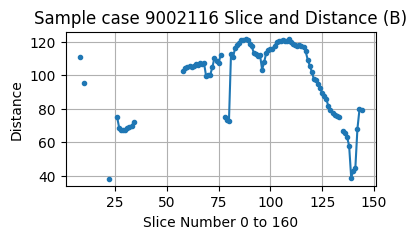

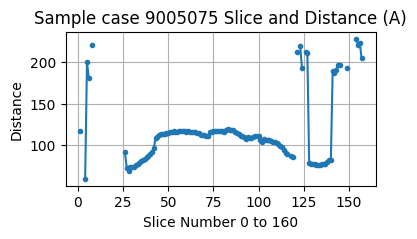

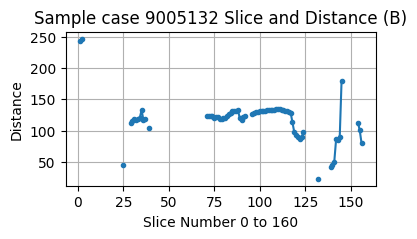

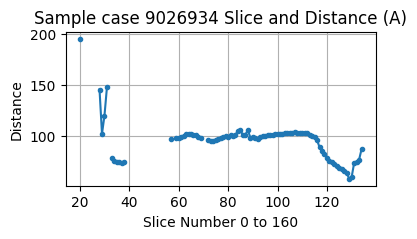

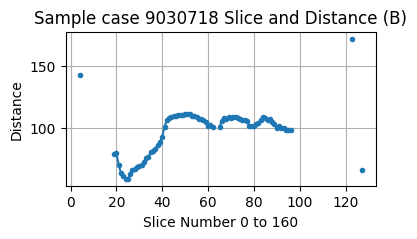

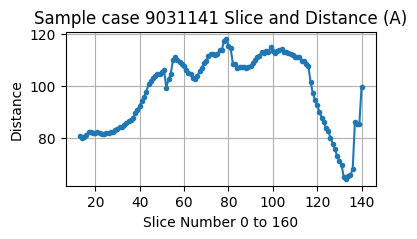

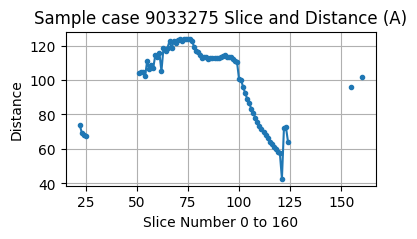

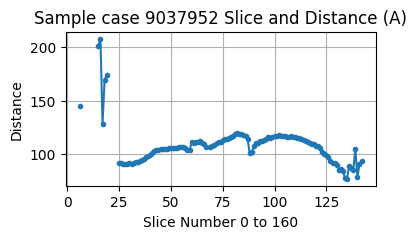

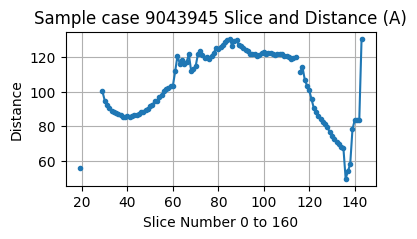

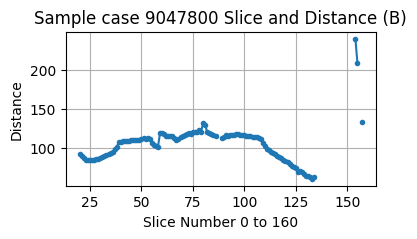

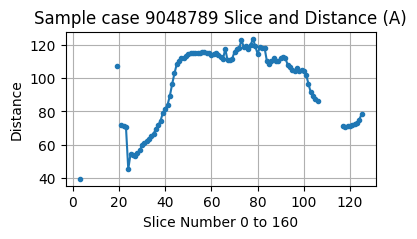

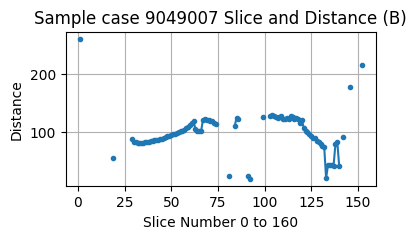

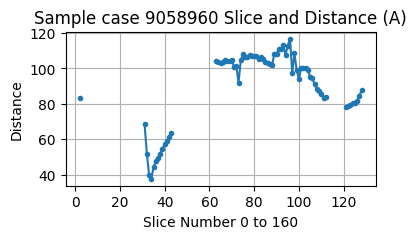

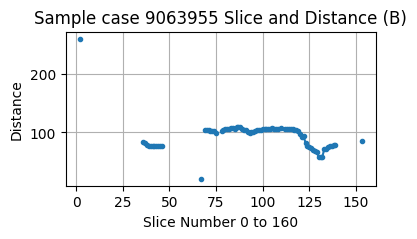

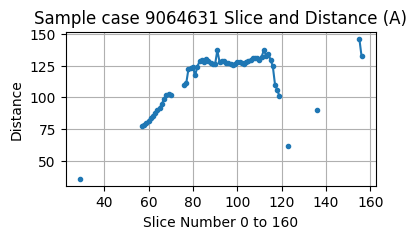

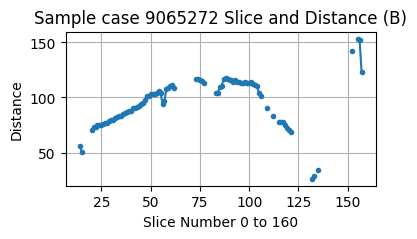

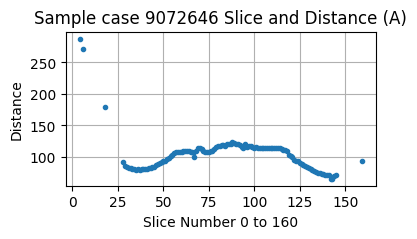

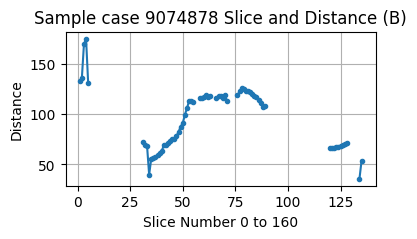

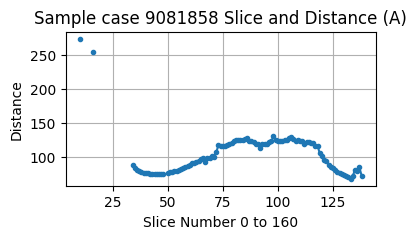

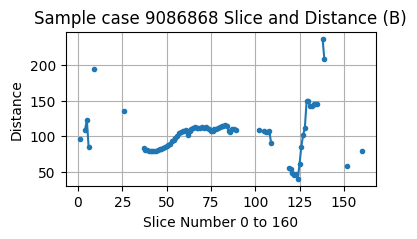

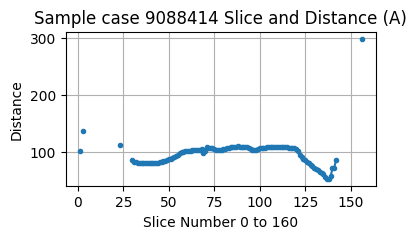

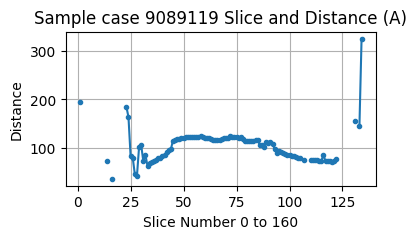

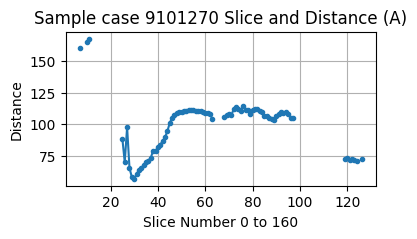

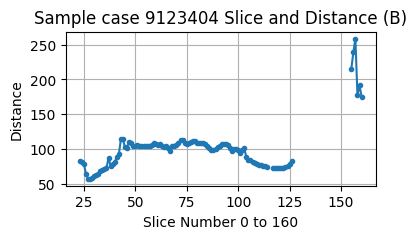

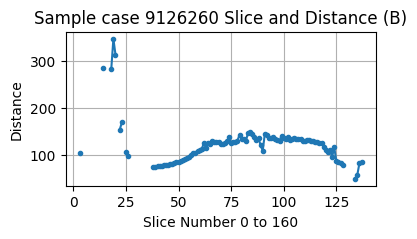

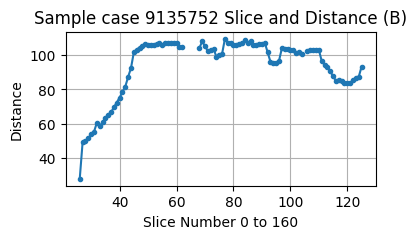

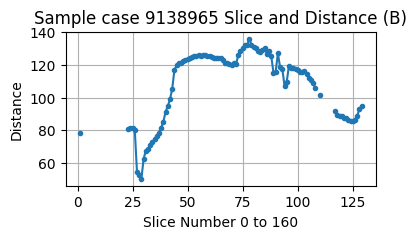

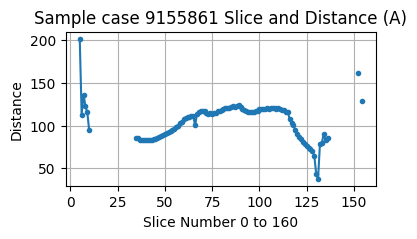

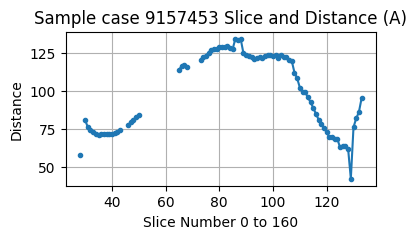

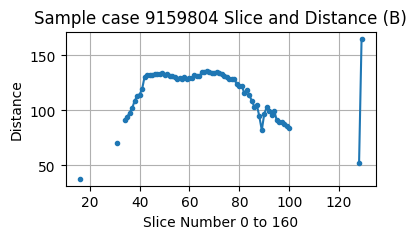

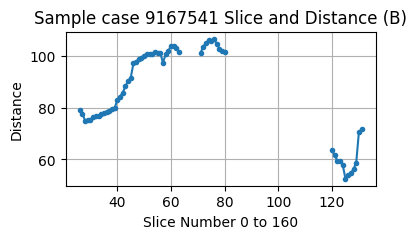

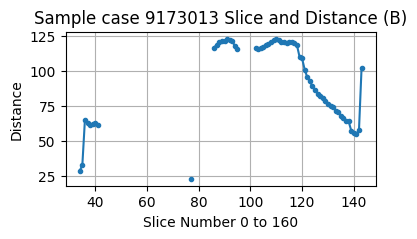

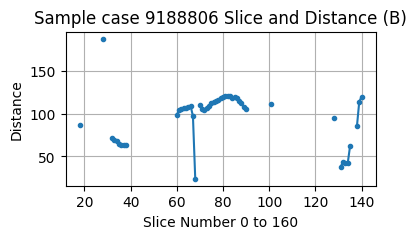

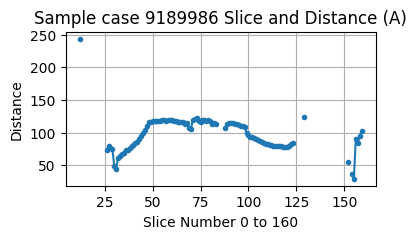

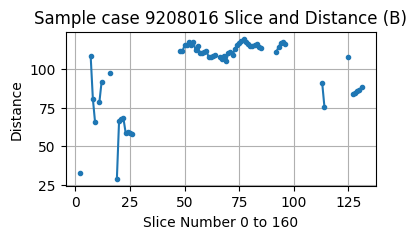

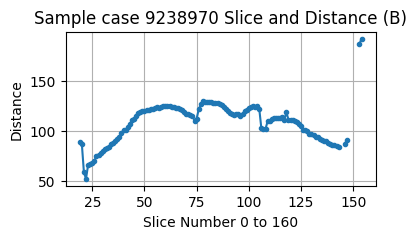

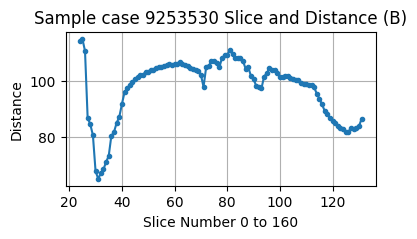

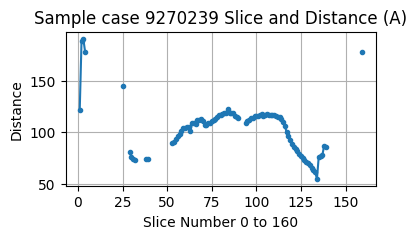

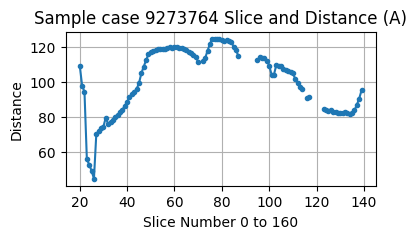

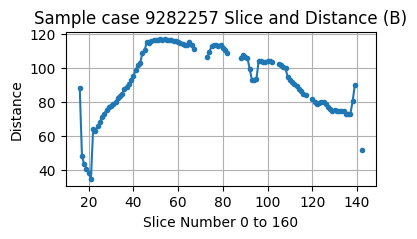

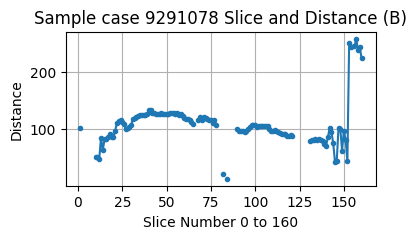

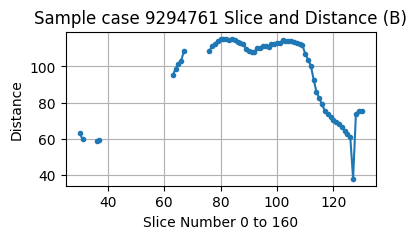

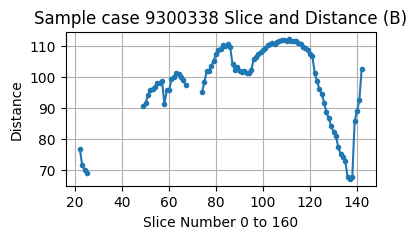

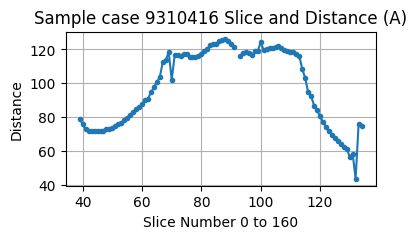

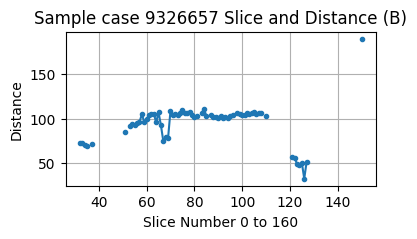

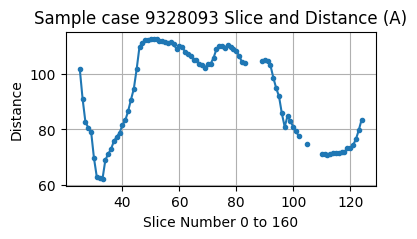

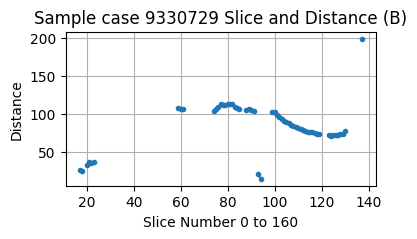

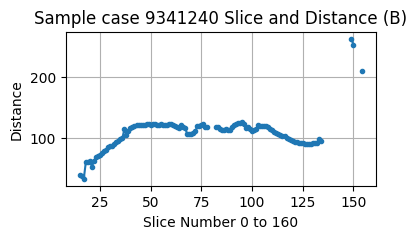

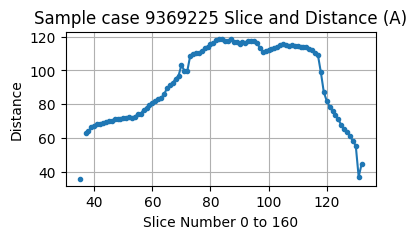

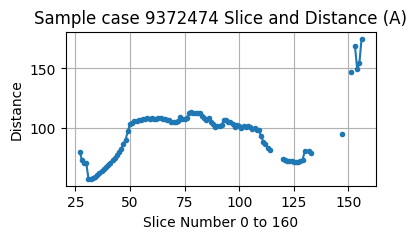

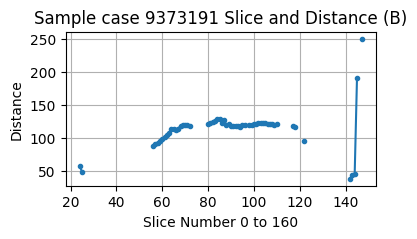

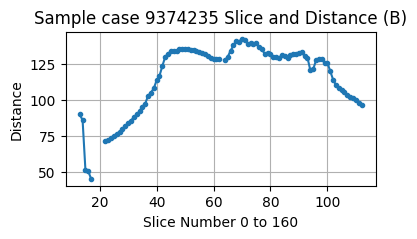

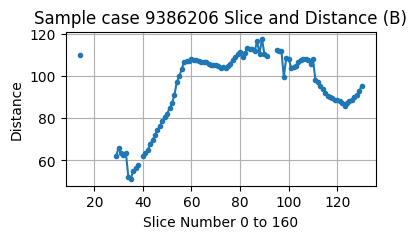

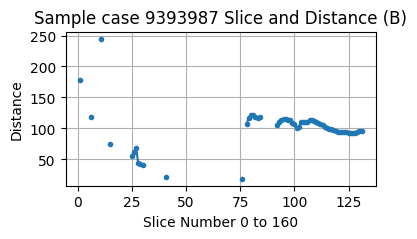

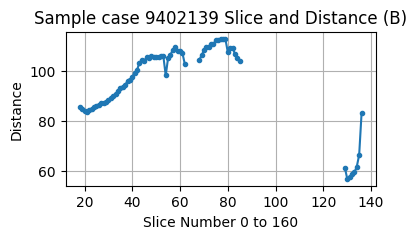

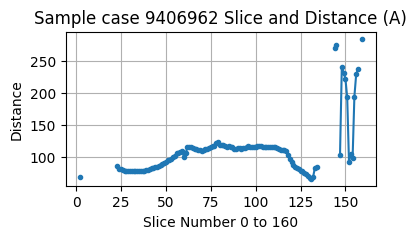

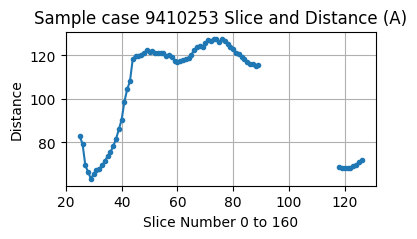

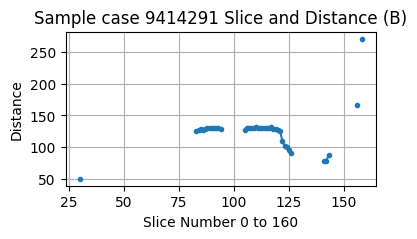

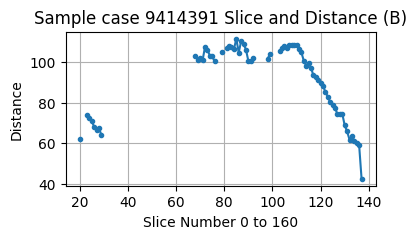

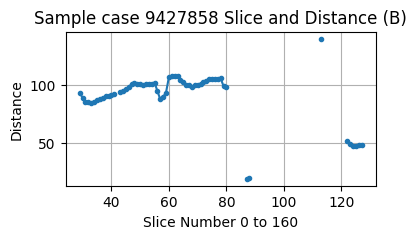

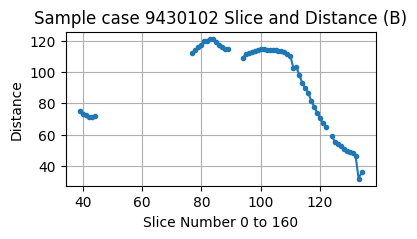

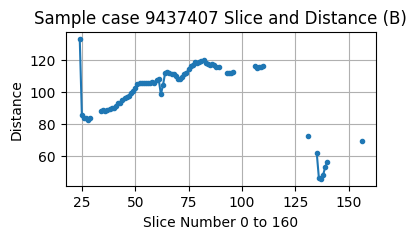

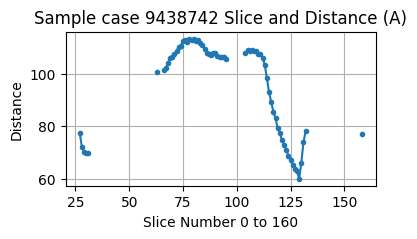

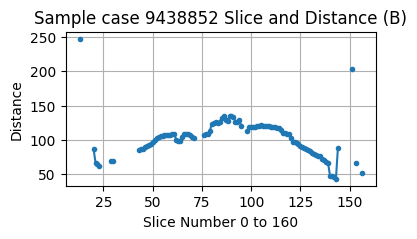

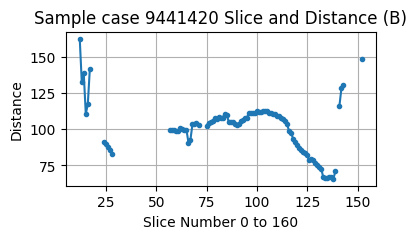

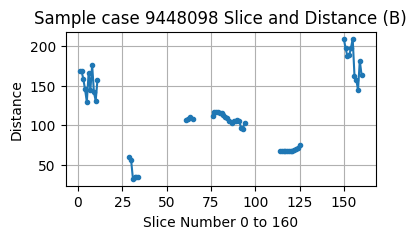

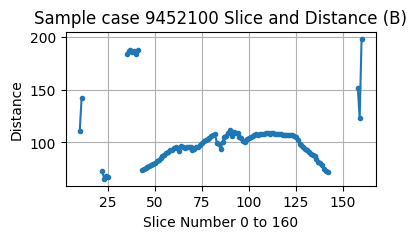

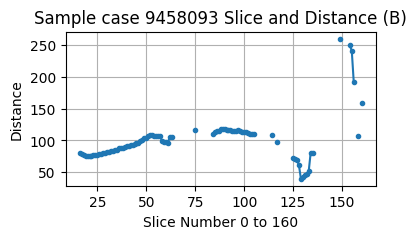

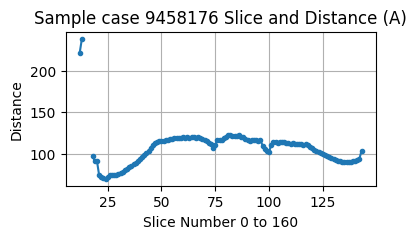

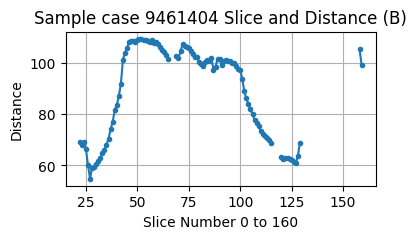

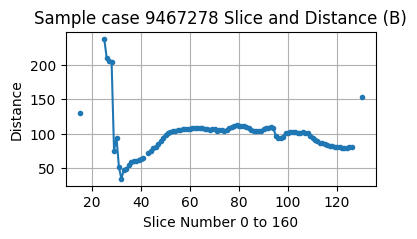

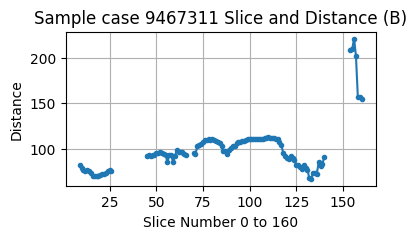

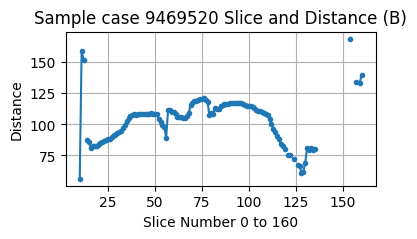

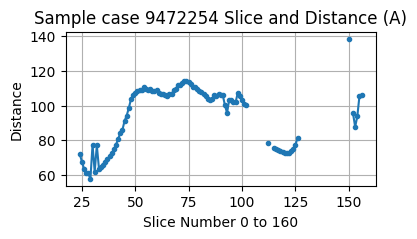

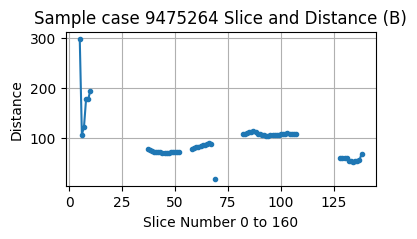

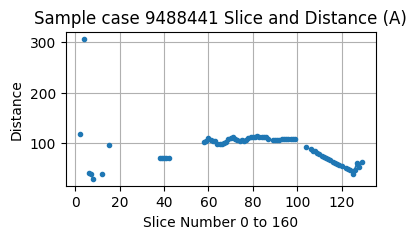

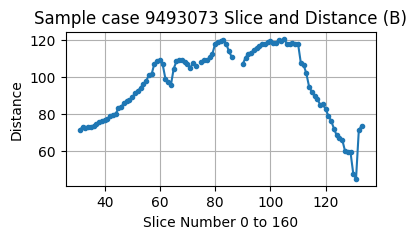

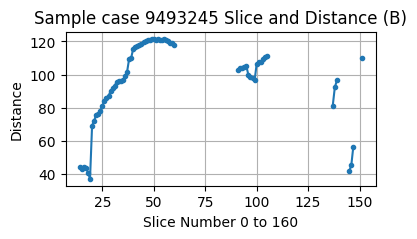

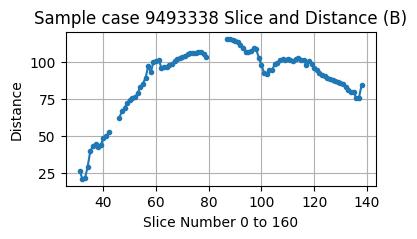

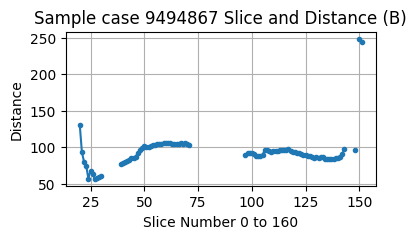

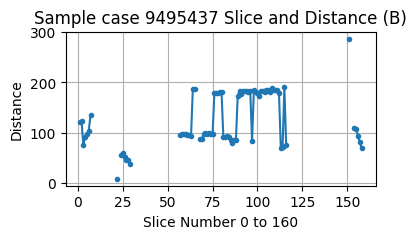

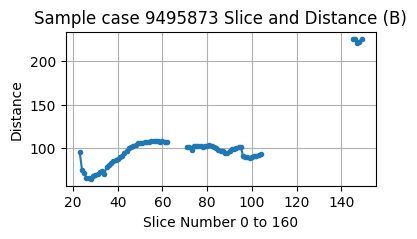

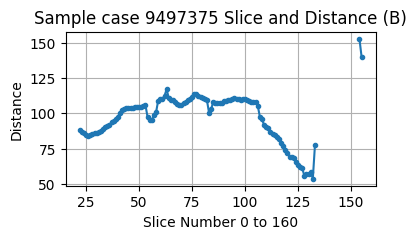

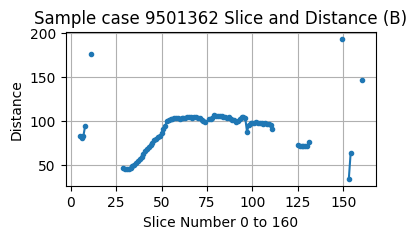

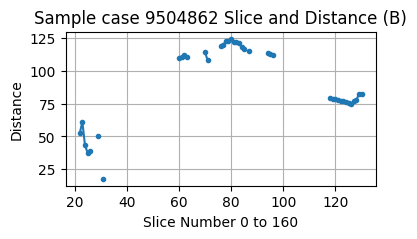

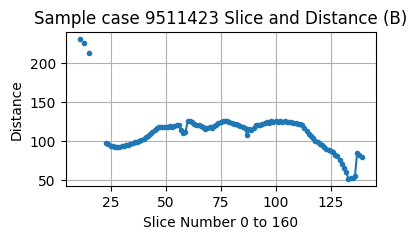

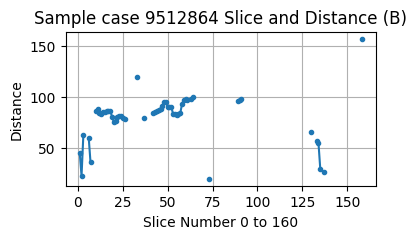

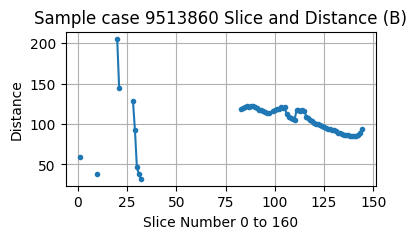

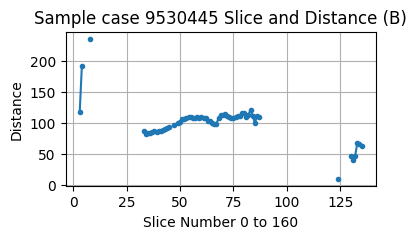

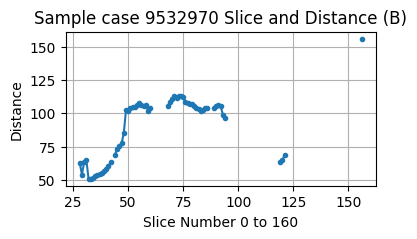

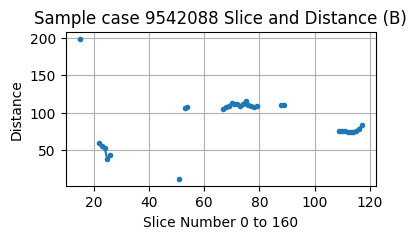

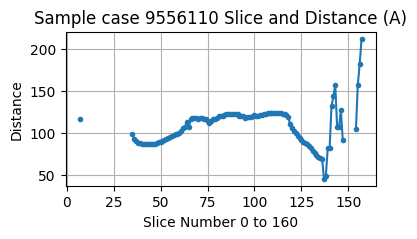

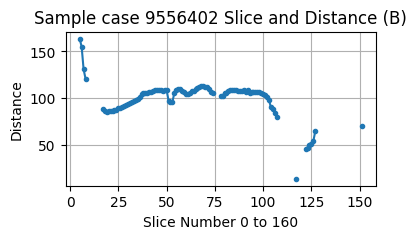

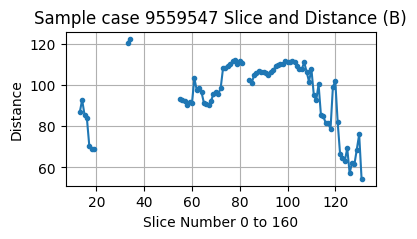

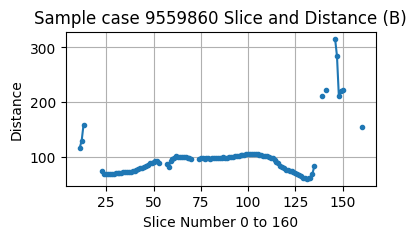

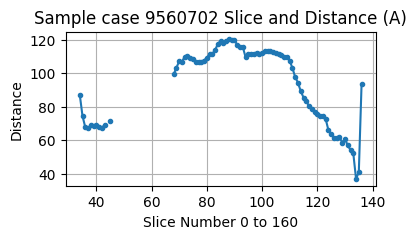

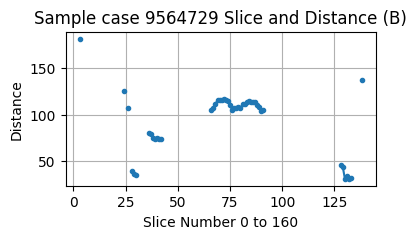

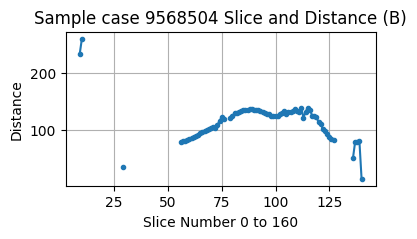

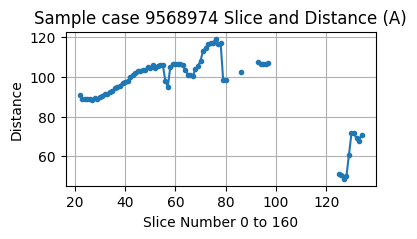

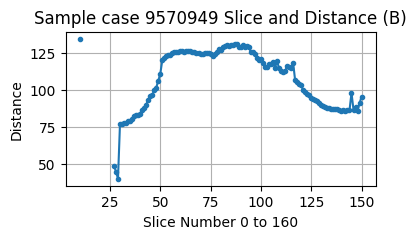

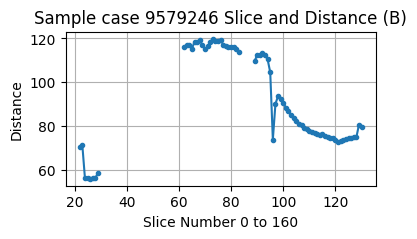

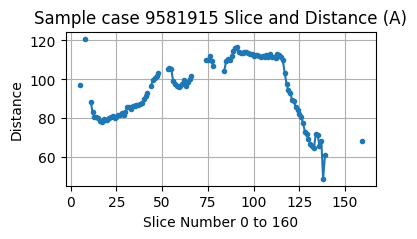

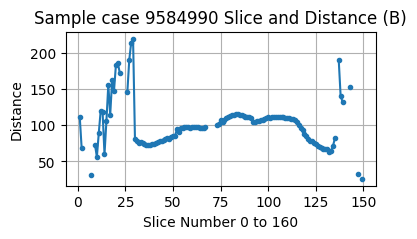

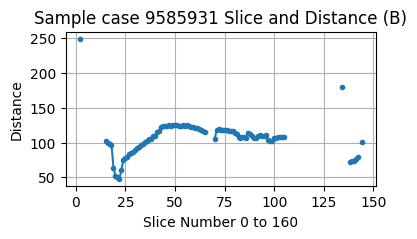

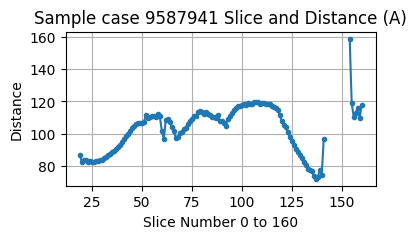

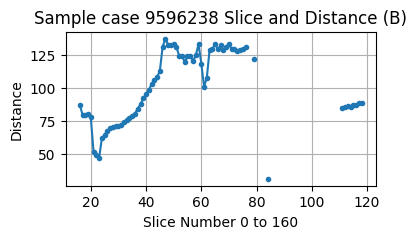

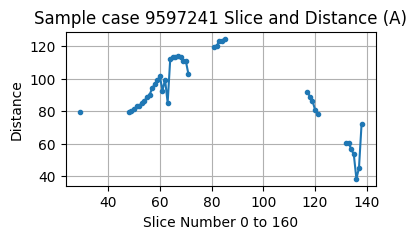

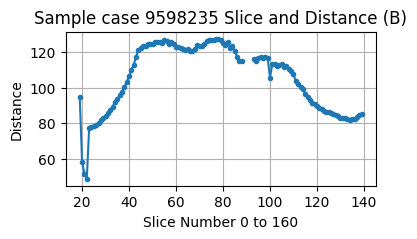

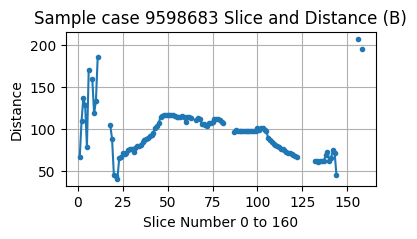

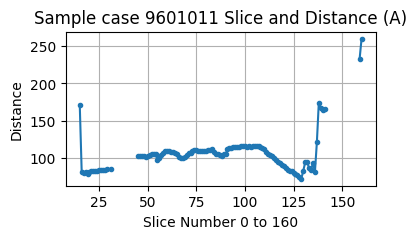

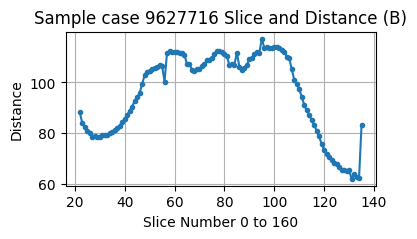

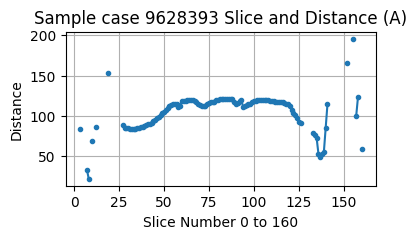

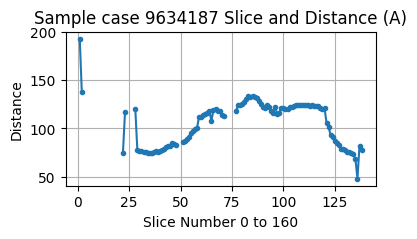

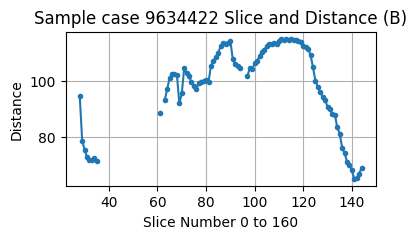

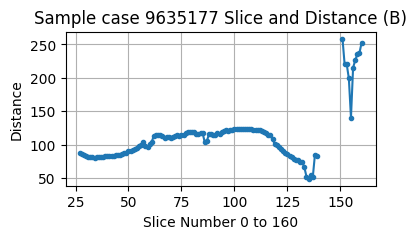

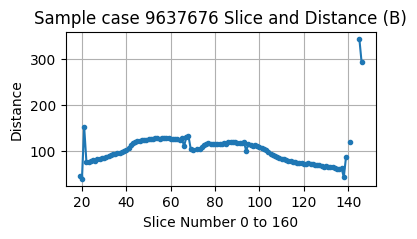

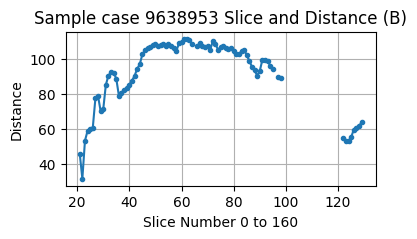

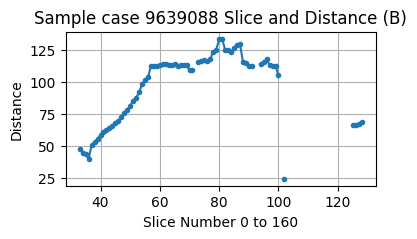

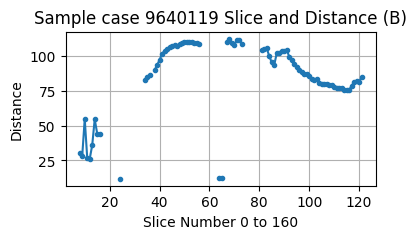

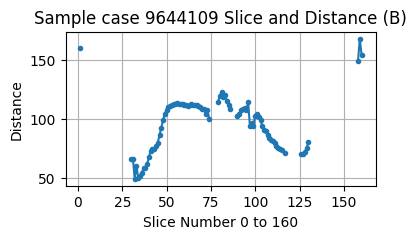

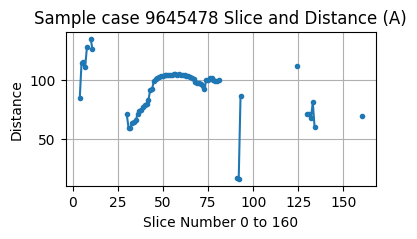

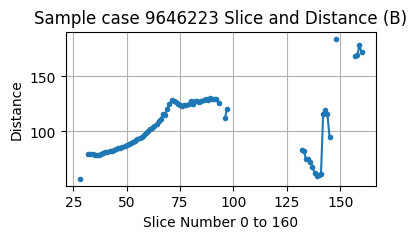

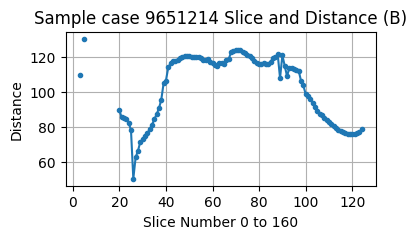

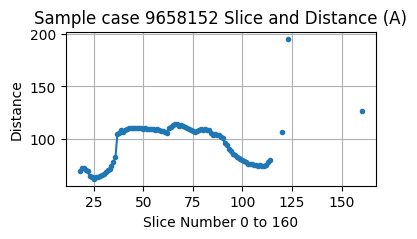

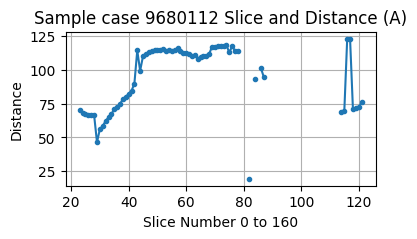

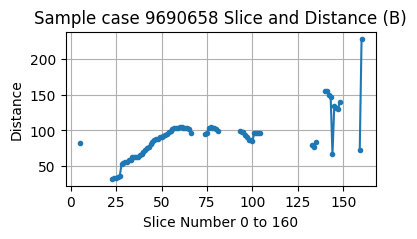

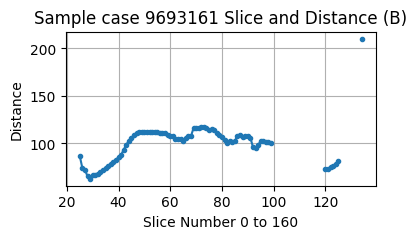

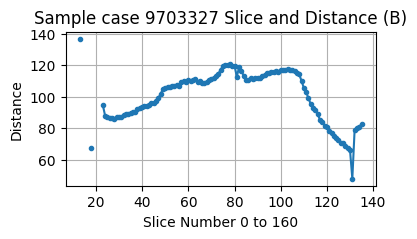

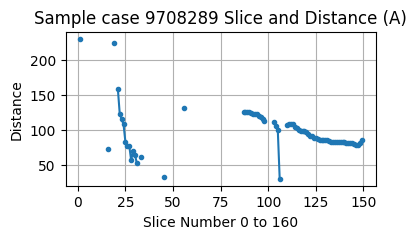

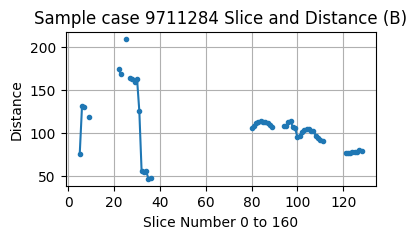

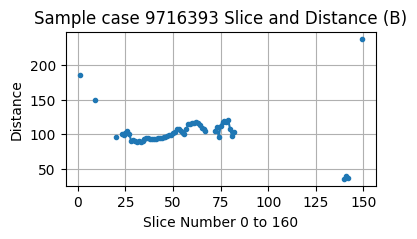

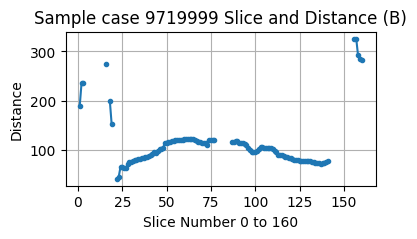

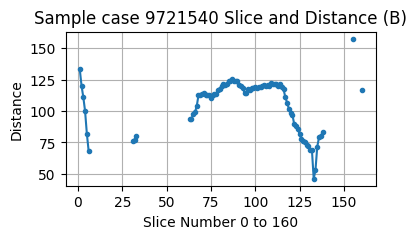

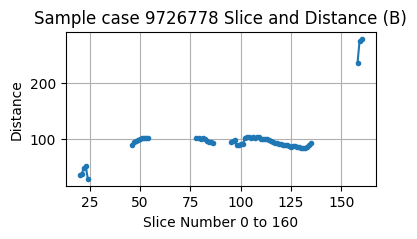

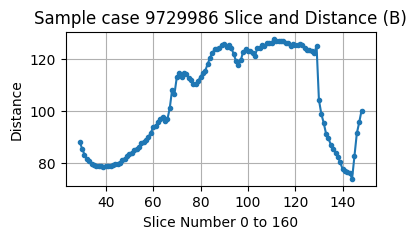

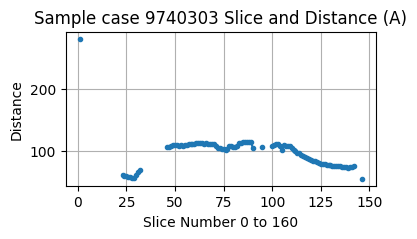

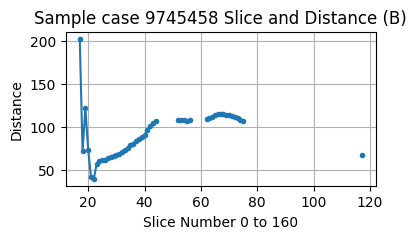

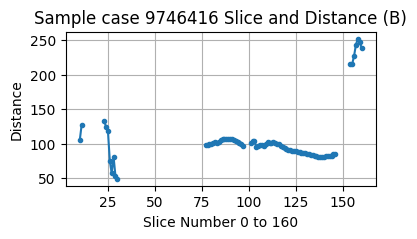

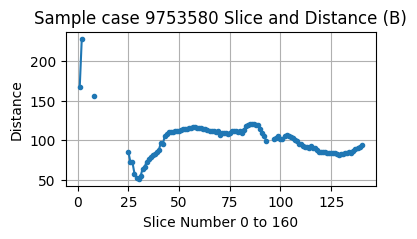

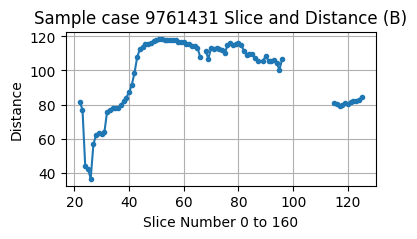

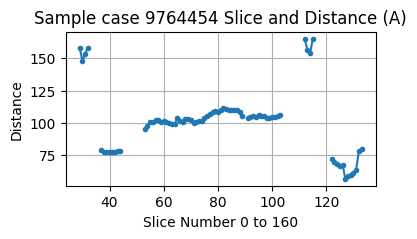

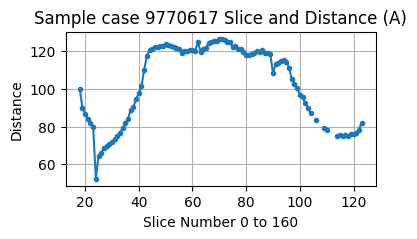

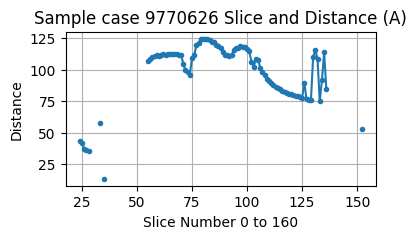

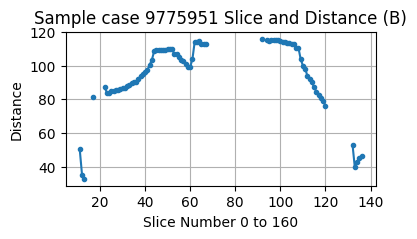

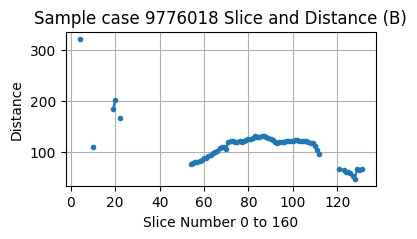

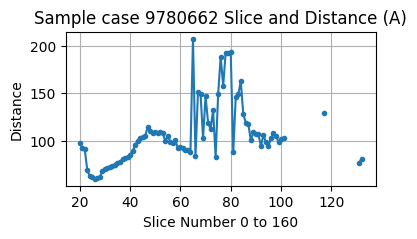

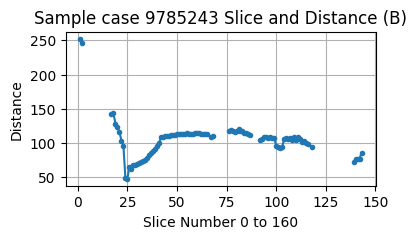

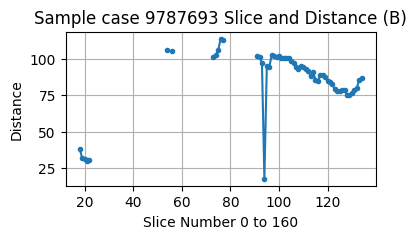

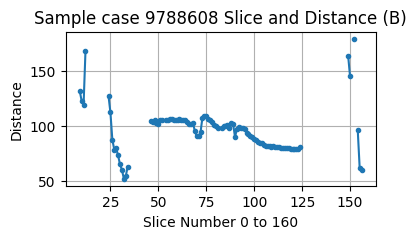

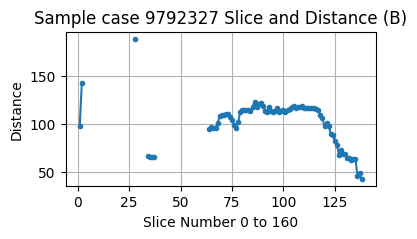

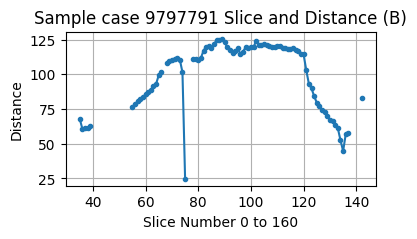

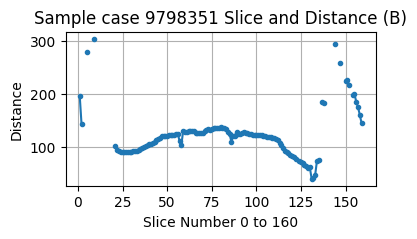

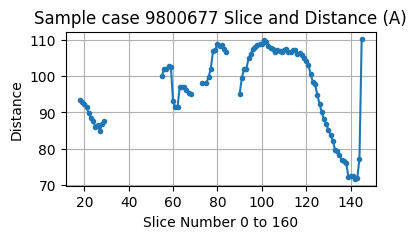

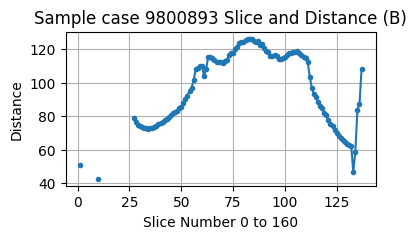

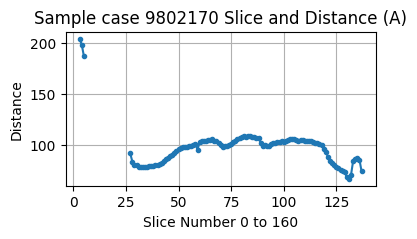

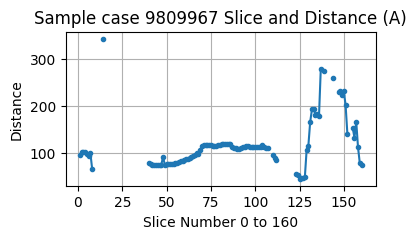

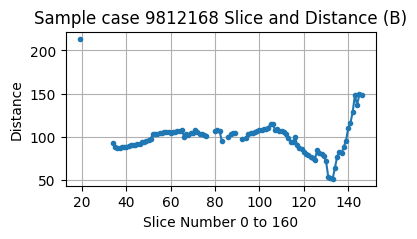

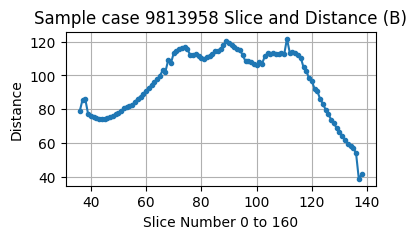

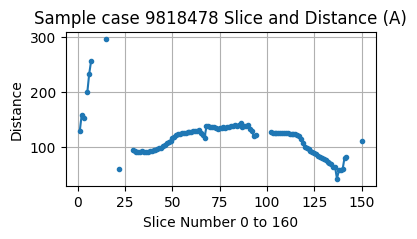

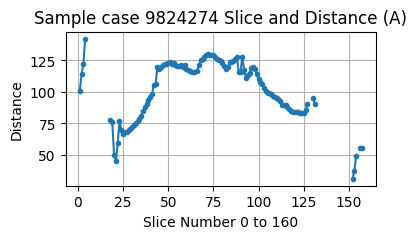

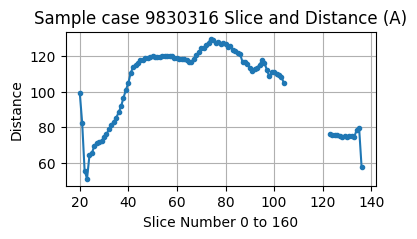

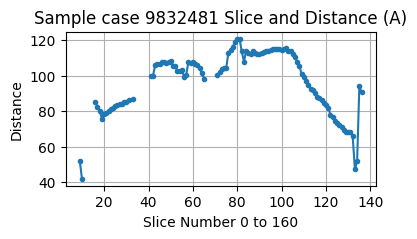

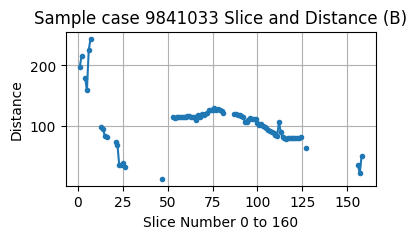

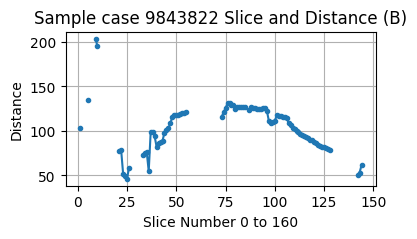

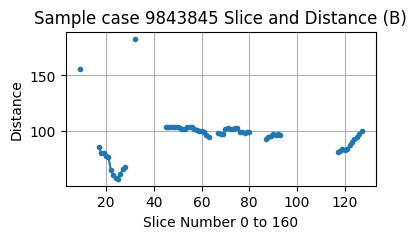

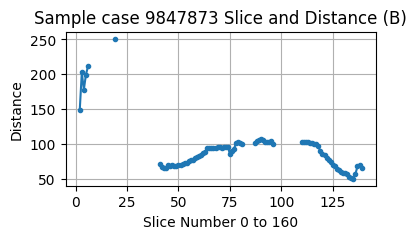

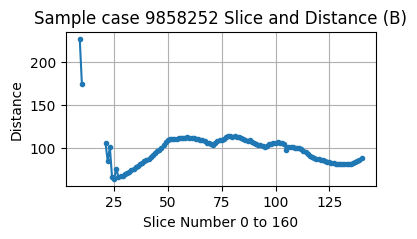

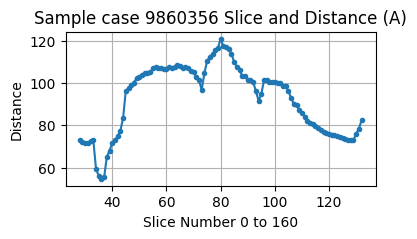

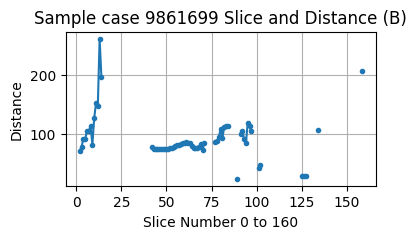

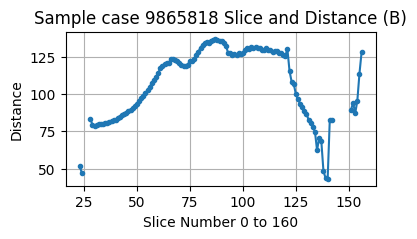

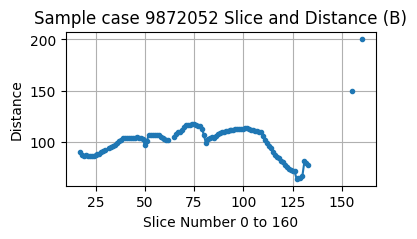

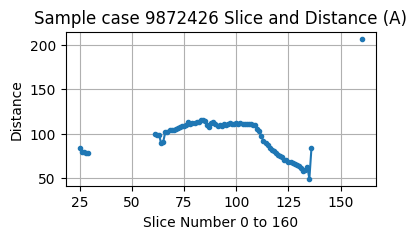

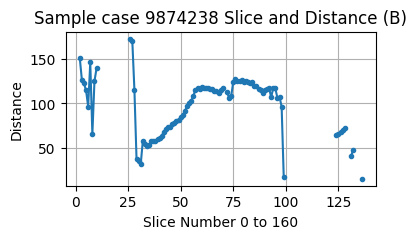

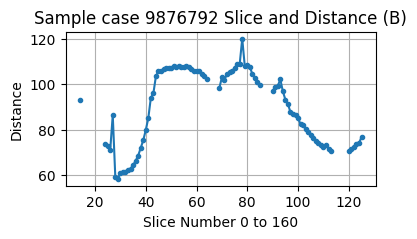

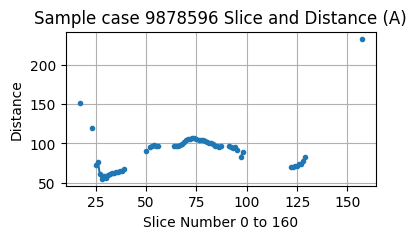

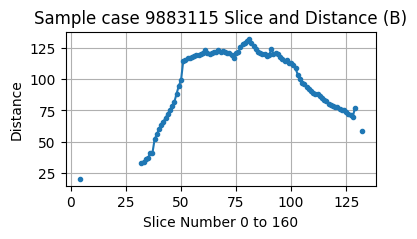

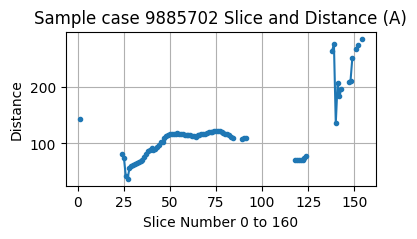

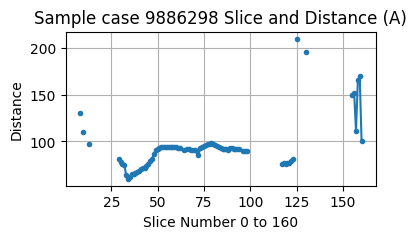

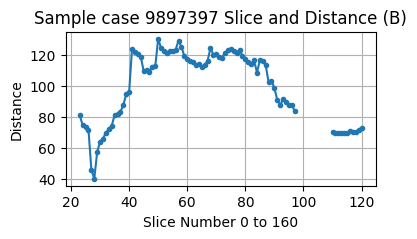

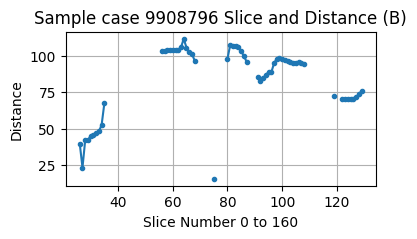

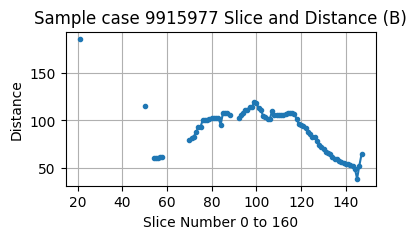

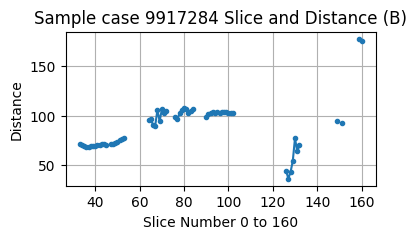

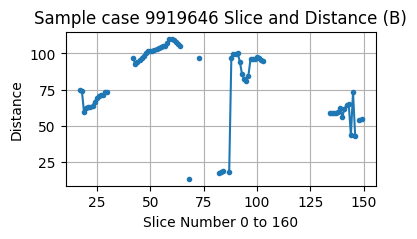

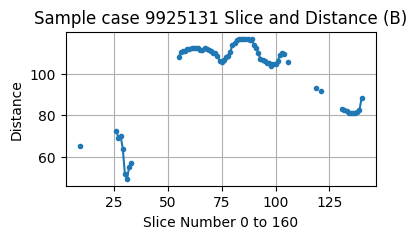

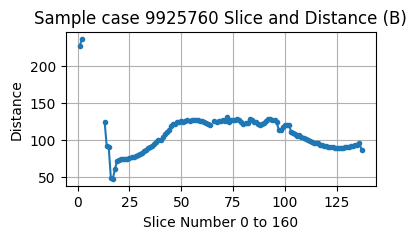

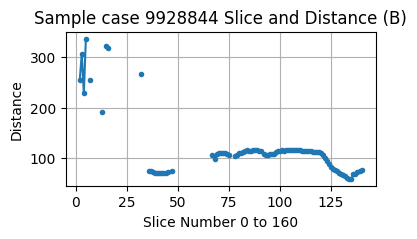

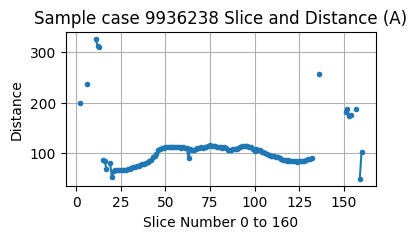

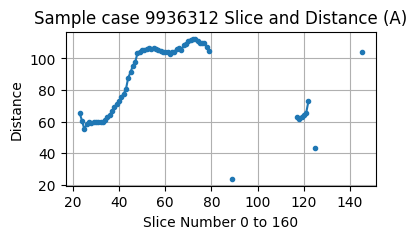

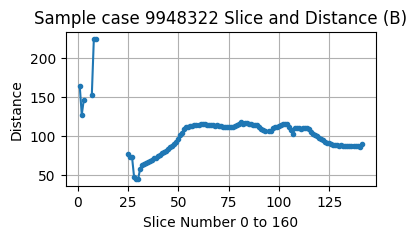

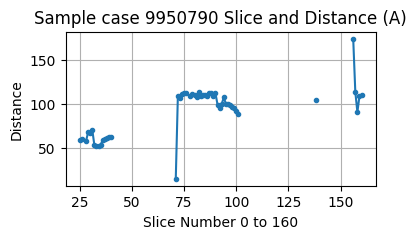

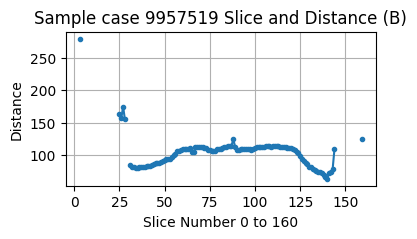

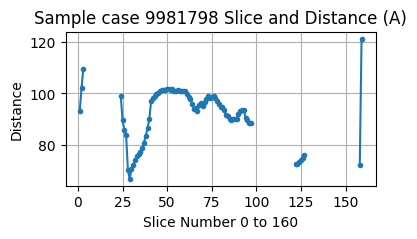

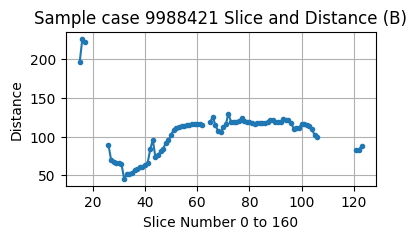

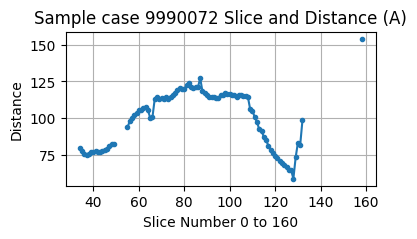

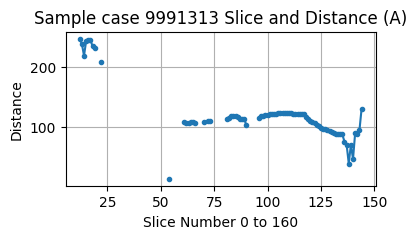

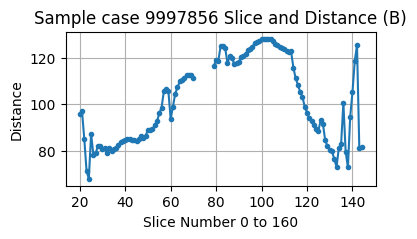

In [3055]:
for case, label in zip(case_list_2, labels):
    case_df = output[output['case'] == case]

    plt.figure(figsize=(4,2))
    plt.plot(case_df['slice'], case_df['distance'], marker='.')

    plt.xlabel('Slice Number 0 to 160')
    plt.ylabel('Distance')
    plt.title(f"Sample case {case} Slice and Distance ({label})")

    plt.grid(True)
    plt.show()